In [103]:
import pandas as pd 
df_prep = pd.read_csv('prepared_Network_Intrusion_Dataset.csv')

In [104]:
x = df_prep.drop(columns=['Traffic_Type','Intrusion_Traffic_Type'])
y = df_prep['Traffic_Type']

In [105]:
y.head()

0       Normal
1    Intrusion
2    Intrusion
3       Normal
4    Intrusion
Name: Traffic_Type, dtype: object

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24,stratify=y)
print(x_train.shape)
print(x_test.shape)

(3998, 20)
(1000, 20)


In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [108]:
y_pred = knn.predict(x_test)

In [109]:
compare_knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_knn_df.head()

,Actual,Predicted
2011,Intrusion,Intrusion
4968,Normal,Normal
813,Intrusion,Intrusion
1917,Intrusion,Intrusion
626,Normal,Normal


In [110]:
compare_knn_df.to_csv('compare_knn.csv', index=True)


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Intrusion       0.93      0.85      0.89       472
      Normal       0.88      0.94      0.91       528

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



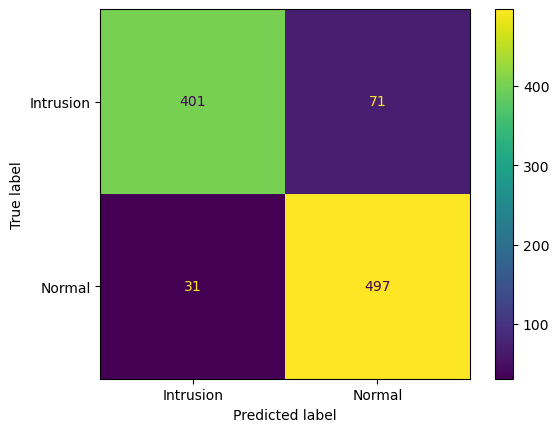

In [112]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm_knn = confusion_matrix(y_test,y_pred,labels=knn.classes_)
disp_knn_cm = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=knn.classes_)
disp_knn_cm.plot()

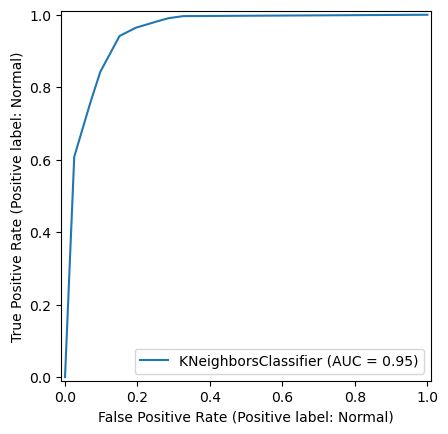

In [113]:
from sklearn.metrics import RocCurveDisplay
knn_roc = RocCurveDisplay.from_estimator(knn, x_test, y_test)

Text(0, 0.5, 'Mean Error')

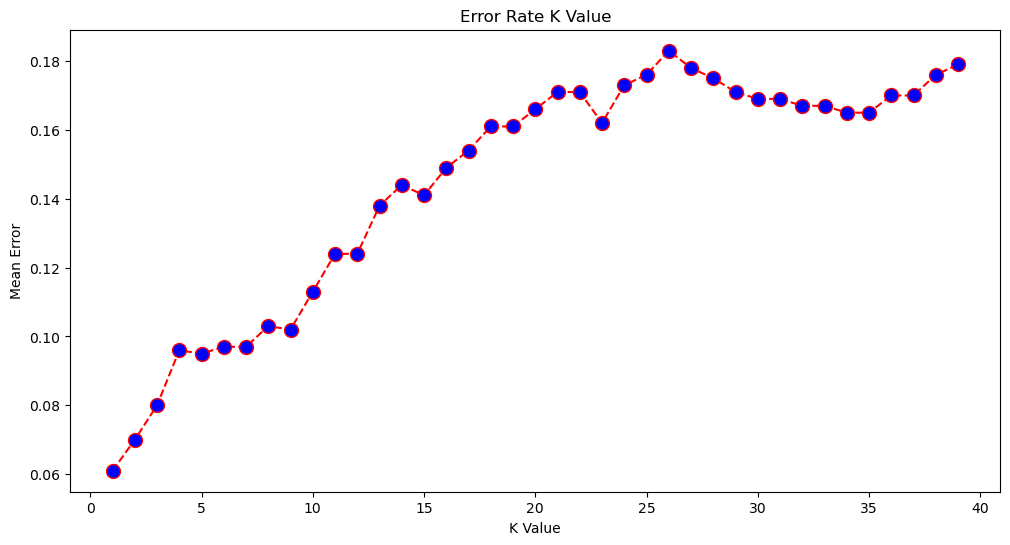

In [114]:
error = []
import numpy as np 
import matplotlib.pyplot as plt
for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    pred_i = knn2.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [115]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train,y_train)
y_pred1 = knn1.predict(x_test)

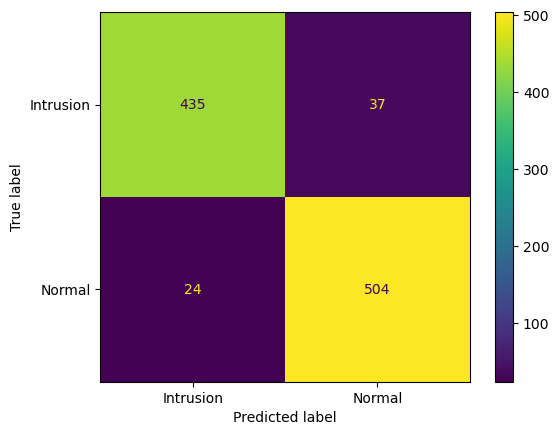

In [116]:
cm_knn1 = confusion_matrix(y_test, y_pred1, labels=knn1.classes_)
disp_knn1_cm = ConfusionMatrixDisplay(confusion_matrix=cm_knn1, display_labels=knn1.classes_)
disp_knn1_cm.plot()


In [117]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

   Intrusion       0.95      0.92      0.93       472
      Normal       0.93      0.95      0.94       528

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



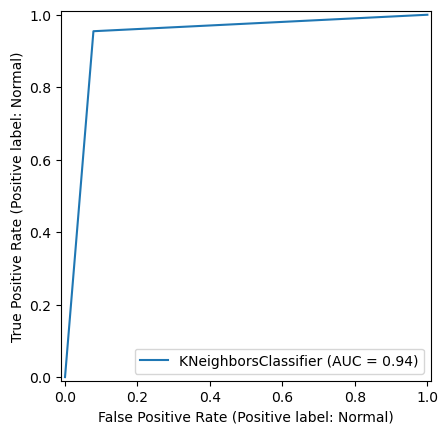

In [118]:
knn1_roc = RocCurveDisplay.from_estimator(knn1, x_test, y_test)

In [119]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

In [120]:
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

              precision    recall  f1-score   support

   Intrusion       0.96      0.97      0.96       472
      Normal       0.97      0.96      0.97       528

    accuracy                           0.96      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.96      0.97      1000



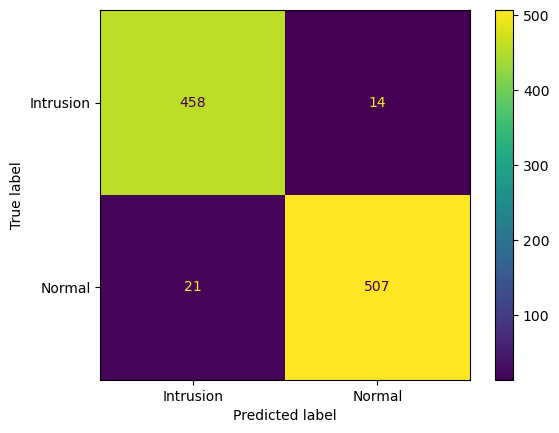

In [121]:
y_pred = knn_gscv.predict(x_test)
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels=knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(confusion_matrix=cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
print(classification_report(y_test, y_pred))

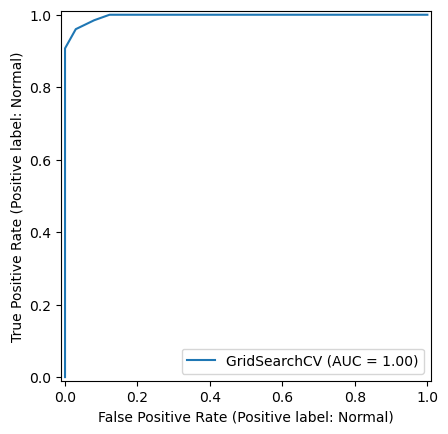

In [122]:
knn_gscv_roc = RocCurveDisplay.from_estimator(knn_gscv, x_test, y_test)